# Example 7

In [1]:
from CircuitCalculator.SimpleCircuit.Elements import Schematic, VoltageSource, Resistor, Line, LabelNode, CurrentSource, Ground
from CircuitCalculator.SimpleCircuit.DiagramSolution import real_network_dc_solution
from CircuitCalculator.Network.NodalAnalysis import nodal_analysis_solver

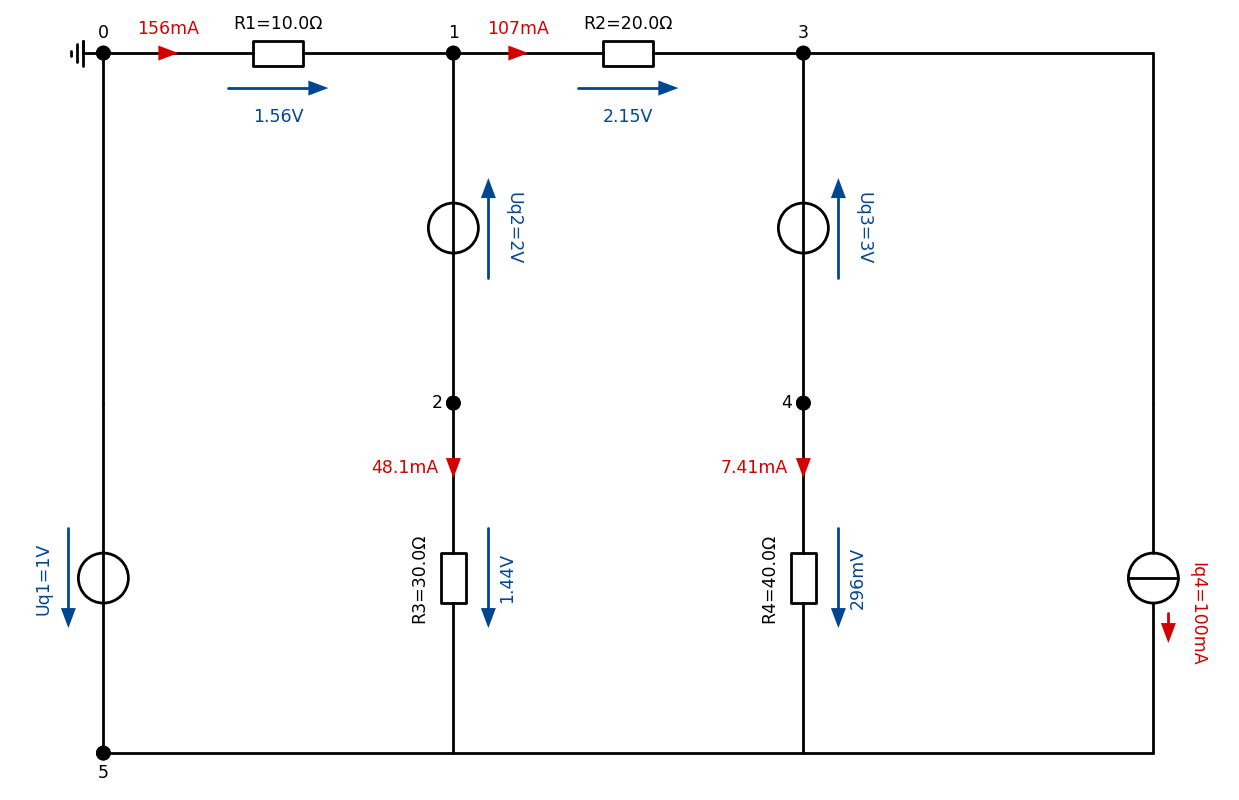

In [2]:
R1, R2, R3, R4 = 10, 20, 30, 40
Uq1, Uq2, Uq3, Iq4 = 1, 2, 3, 0.1

with Schematic() as schematic:
    schematic += LabelNode(id='5', id_loc='S')
    schematic += VoltageSource(V=Uq1, name='Uq1', precision=1).up()
    schematic += Line().up()
    schematic += LabelNode(id='0', id_loc='N')
    schematic += Ground().left()
    schematic += (_R1:=Resistor(R=R1, name='R1').right())
    schematic += LabelNode(id='1', id_loc='N')
    schematic += VoltageSource(V=Uq2, name='Uq2', precision=1).down() #!!!f
    schematic += LabelNode(id='2', id_loc='W')
    schematic += Resistor(R=R3, name='R3').down()
    schematic += (_R2:=Resistor(R=R2, name='R2').right().at(_R1.end))
    schematic += LabelNode(id='3', id_loc='N')
    schematic += VoltageSource(V=Uq3, name='Uq3', precision=1).down()
    schematic += LabelNode(id='4', id_loc='W')
    schematic += Resistor(R=R4, name='R4').down()
    schematic += Line().right().at(_R2.end)
    schematic += Line().down()
    schematic += CurrentSource(I=Iq4, name='Iq4').down()
    schematic += Line().left()
    schematic += Line().left()
    schematic += Line().left()
    schemdraw_solution = real_network_dc_solution(schematic)
    schematic += schemdraw_solution.draw_voltage('R1')
    schematic += schemdraw_solution.draw_voltage('R2')
    schematic += schemdraw_solution.draw_voltage('R3')
    schematic += schemdraw_solution.draw_voltage('R4')
    schematic += schemdraw_solution.draw_current('R1')
    schematic += schemdraw_solution.draw_current('R2')
    schematic += schemdraw_solution.draw_current('R3')
    schematic += schemdraw_solution.draw_current('R4')